### Main libraries

### Simple Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
price4 = pd.read_csv('agrodata.csv')
price4.head()

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67


In [ ]:
price4['Date'] = pd.to_datetime(price4['Date'], format = '%d/%m/%Y')
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    988 non-null    datetime64[ns]
 1   Price   988 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.6 KB


In [ ]:
weather4 = pd.read_csv('agroweather_data.csv')
weather4.head()

,Unnamed: 0,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,...,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,bateria,fechaUtlMod,et0
0,0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,...,1.742,346.500,4.606,02:20,347.600,10.990,0.0,12.88,2020-01-03T07:45:00.000+0100,1.343917
1,1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,...,1.473,359.600,3.998,05:23,0.000,7.060,0.0,12.87,2020-01-04T07:45:00.000+0100,1.199930
2,2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,...,2.111,326.300,4.302,03:35,337.000,9.860,0.0,12.86,2020-01-05T07:45:00.000+0100,1.397516
3,3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,...,1.699,40.730,4.439,01:56,0.095,6.104,0.0,12.87,2020-01-06T07:45:00.000+0100,1.374706
4,4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,...,1.863,4.554,5.184,06:27,326.400,11.050,0.0,12.85,2020-01-07T07:45:00.000+0100,1.695512


In [ ]:
weather4.drop(['Unnamed: 0', 'dirViento', 'radiacion', 'precipitacion', 'bateria', 'fechaUtlMod', 'et0'], axis = 1, inplace = True)
weather4.head()

,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,19:04,61.53,10:42,1.742,4.606,02:20,347.600
1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,18:30,62.73,12:30,1.473,3.998,05:23,0.000
2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,20:26,64.39,12:38,2.111,4.302,03:35,337.000
3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,04:26,58.06,11:32,1.699,4.439,01:56,0.095
4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,18:16,49.78,11:30,1.863,5.184,06:27,326.400


In [ ]:
weather4['fecha'] = pd.to_datetime(weather4['fecha'])
weather4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            1505 non-null   datetime64[ns]
 1   dia              1505 non-null   int64         
 2   tempMedia        1505 non-null   float64       
 3   tempMax          1505 non-null   float64       
 4   horMinTempMax    1505 non-null   object        
 5   tempMin          1505 non-null   float64       
 6   horMinTempMin    1505 non-null   object        
 7   humedadMedia     1505 non-null   float64       
 8   humedadMax       1505 non-null   float64       
 9   horMinHumMax     1505 non-null   object        
 10  humedadMin       1505 non-null   float64       
 11  horMinHumMin     1505 non-null   object        
 12  velViento        1505 non-null   float64       
 13  velVientoMax     1505 non-null   float64       
 14  horMinVelMax     1505 non-null   object 

In [ ]:
final4 = price4.merge(weather4, how = 'inner', left_on = 'Date', right_on = 'fecha')
final4.head()

,Date,Price,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,2020-01-02,74,2020-01-02,2,12.19,15.32,12:32,10.390,17:56,75.7,85.6,18:30,62.73,12:30,1.473,3.998,05:23,0.000
1,2020-01-03,81,2020-01-03,3,11.77,16.18,13:36,7.940,06:58,77.8,86.8,20:26,64.39,12:38,2.111,4.302,03:35,337.000
2,2020-01-04,77,2020-01-04,4,12.79,16.79,11:40,9.000,04:20,72.6,86.2,04:26,58.06,11:32,1.699,4.439,01:56,0.095
3,2020-01-07,73,2020-01-07,7,10.82,16.17,13:32,6.878,06:50,71.7,86.9,20:34,48.00,09:38,1.550,4.449,03:38,0.095
4,2020-01-08,67,2020-01-08,8,11.36,16.24,12:46,7.280,06:08,74.0,90.0,19:24,57.02,09:40,1.056,3.508,08:29,354.700


In [ ]:
final4.drop(['Date', 'fecha', 'horMinTempMin', 'horMinHumMin'], axis = 1, inplace = True)
final4.head()

,Price,dia,tempMedia,tempMax,horMinTempMax,tempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,74,2,12.19,15.32,12:32,10.390,75.7,85.6,18:30,62.73,1.473,3.998,05:23,0.000
1,81,3,11.77,16.18,13:36,7.940,77.8,86.8,20:26,64.39,2.111,4.302,03:35,337.000
2,77,4,12.79,16.79,11:40,9.000,72.6,86.2,04:26,58.06,1.699,4.439,01:56,0.095
3,73,7,10.82,16.17,13:32,6.878,71.7,86.9,20:34,48.00,1.550,4.449,03:38,0.095
4,67,8,11.36,16.24,12:46,7.280,74.0,90.0,19:24,57.02,1.056,3.508,08:29,354.700


In [ ]:
final4.drop(['horMinTempMax', 'horMinHumMax'], axis = 1, inplace = True)

In [ ]:
final4.drop('horMinVelMax', axis = 1, inplace = True)
final4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            983 non-null    int64  
 1   dia              983 non-null    int64  
 2   tempMedia        983 non-null    float64
 3   tempMax          983 non-null    float64
 4   tempMin          983 non-null    float64
 5   humedadMedia     983 non-null    float64
 6   humedadMax       983 non-null    float64
 7   humedadMin       983 non-null    float64
 8   velViento        983 non-null    float64
 9   velVientoMax     983 non-null    float64
 10  dirVientoVelMax  983 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 84.6 KB


In [ ]:
price5 = price4.copy()
price5

,Date,Price
0,2020-01-02,74
1,2020-01-03,81
2,2020-01-04,77
3,2020-01-07,73
4,2020-01-08,67
...,...,...
983,2024-02-14,125
984,2024-02-14,125
985,2024-02-15,124
986,2024-02-16,122


In [ ]:
price5 = price5.set_index(price5['Date'])
price5.head

<bound method NDFrame.head of                  Date  Price
Date                        
2020-01-02 2020-01-02     74
2020-01-03 2020-01-03     81
2020-01-04 2020-01-04     77
2020-01-07 2020-01-07     73
2020-01-08 2020-01-08     67
...               ...    ...
2024-02-14 2024-02-14    125
2024-02-14 2024-02-14    125
2024-02-15 2024-02-15    124
2024-02-16 2024-02-16    122
2024-02-17 2024-02-17    115

[988 rows x 2 columns]>

In [ ]:
price4['Training'] = price4['Price'].shift(-15).values
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      988 non-null    datetime64[ns]
 1   Price     988 non-null    int64         
 2   Training  973 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.3 KB


Lo que vamos a hacer ahora es completar los valores que faltan con la moda del precio, es decir, el valor que más aparece.

In [ ]:
price4['Training'] = price4['Training'].fillna(price4['Price'].mode()[0])

In [ ]:
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      988 non-null    datetime64[ns]
 1   Price     988 non-null    int64         
 2   Training  988 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.3 KB


In [ ]:
price4 = price4.rename(columns = {'Price':'Target'})
price4.head()

,Date,Target,Training
0,2020-01-02,74,91.0
1,2020-01-03,81,91.0
2,2020-01-04,77,92.0
3,2020-01-07,73,93.0
4,2020-01-08,67,94.0


In [ ]:
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      988 non-null    datetime64[ns]
 1   Target    988 non-null    int64         
 2   Training  988 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.3 KB


In [ ]:
price4['Target'] = price4['Target'].astype(float)
price4.head()

,Date,Target,Training
0,2020-01-02,74.0,91.0
1,2020-01-03,81.0,91.0
2,2020-01-04,77.0,92.0
3,2020-01-07,73.0,93.0
4,2020-01-08,67.0,94.0


In [ ]:
price4.drop('Date', axis = 1, inplace = True)

In [ ]:
X = price4.drop('Target', axis = 1)[:100]
y = price4['Target'][:100]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
lr = LinearRegression()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.7, random_state= 123) 

Ahora mimso estamos utilizando 30 días de entrenamiento para predecir los próximos 70 días.

In [ ]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((30, 1), (70, 1), (30,), (70,))

In [ ]:
lr.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
predictions2 = lr.predict(X_test2)

In [ ]:
type(predictions2)

numpy.ndarray

In [ ]:
pd_predictions2 = pd.DataFrame(predictions2)
pd_predictions2.rename(columns = {0:'Preds'})

,Preds
0,117.626590
1,127.961614
2,120.335771
3,119.031351
4,128.362974
...,...
65,117.225230
66,117.124890
67,126.556853
68,129.266034


In [ ]:
pd_ytest2 = pd.DataFrame(y_test2)
pd_ytest2.shape

(70, 1)

In [ ]:
outcome = mean_absolute_error(predictions2, y_test2)
print(f"El error medio absoluto es de {round((outcome/100), 2)}€.")

El error medio absoluto es de 0.29€.


In [ ]:
sm_error = abs(predictions2 - y_test2)
sm_error

8      45.626590
70     35.961614
82    100.664229
28     13.031351
63      3.637026
         ...    
10     14.225230
58      0.875110
71     60.556853
64      5.733966
3      44.927610
Name: Target, Length: 70, dtype: float64

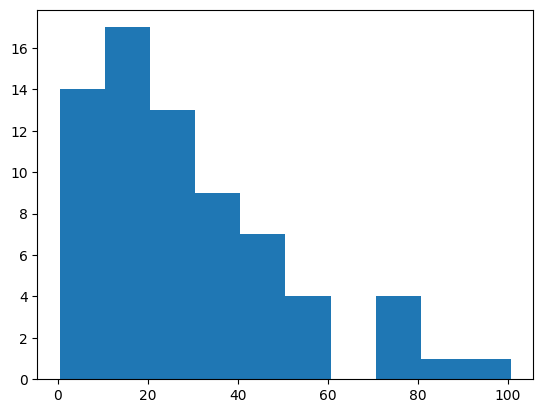

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(sm_error)
plt.show()
plt.clf()

In [ ]:
sm_error.describe()

count     70.000000
mean      28.818125
std       21.866729
min        0.463549
25%       14.377440
50%       25.230331
75%       36.603206
max      100.664229
Name: Target, dtype: float64

Ahora vamos a predecir sobre 15 días a futuro.

In [ ]:
price4.head()

,Target,Training
0,74.0,91.0
1,81.0,91.0
2,77.0,92.0
3,73.0,93.0
4,67.0,94.0


In [ ]:
X_future = price4['Training'][-30:-15].values.reshape(-1,1)

future_predictions = lr.predict(X_future)


future_predictions

array([122.54325197, 122.74393203, 122.84427207, 122.74393203,
       123.04495213, 122.74393203, 123.2456322 , 122.54325197,
       122.3425719 , 121.64019167, 121.13849151, 121.13849151,
       121.03815148, 120.83747141, 120.13509118])

In [ ]:
print(X_future)

[[139.]
 [141.]
 [142.]
 [141.]
 [144.]
 [141.]
 [146.]
 [139.]
 [137.]
 [130.]
 [125.]
 [125.]
 [124.]
 [122.]
 [115.]]


In [ ]:
sm_days_15 = abs(future_predictions - y_test2[-15:])

In [ ]:
sm_days_15.describe()

count    15.000000
mean     30.703827
std      14.651755
min       3.138492
25%      18.591722
50%      29.754368
75%      41.942912
max      55.038151
Name: Target, dtype: float64

Con 15 días de entrenamiento, intentamos predecir otros 15 días, obteniendo un error medio absoluto de 30 céntimos. 